In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import pyplot
from datetime import datetime
import dateutil.parser
import os

In [3]:
data = pd.read_csv('../ProjectML/US_Accidents_Dec19.csv')

Time Zone

Text(0.5, 1.0, 'Accidents in Different Timezone')

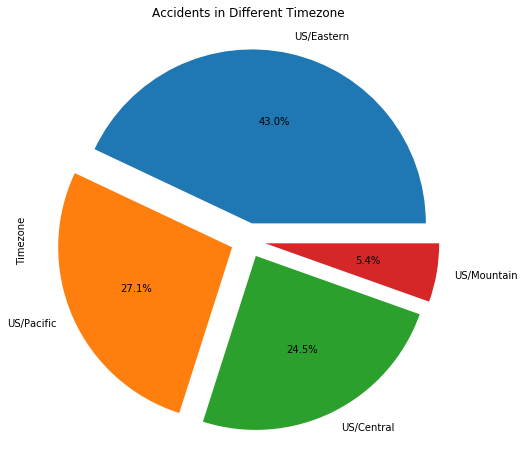

In [4]:
fig = plt.figure(figsize=[18, 8])
data['Timezone'].value_counts().plot.pie(explode=[0.1,0.1,0.1,0.1],autopct='%1.1f%%')
plt.title('Accidents in Different Timezone')

Text(0.5, 1.0, 'Accident Count Based on Timezone')

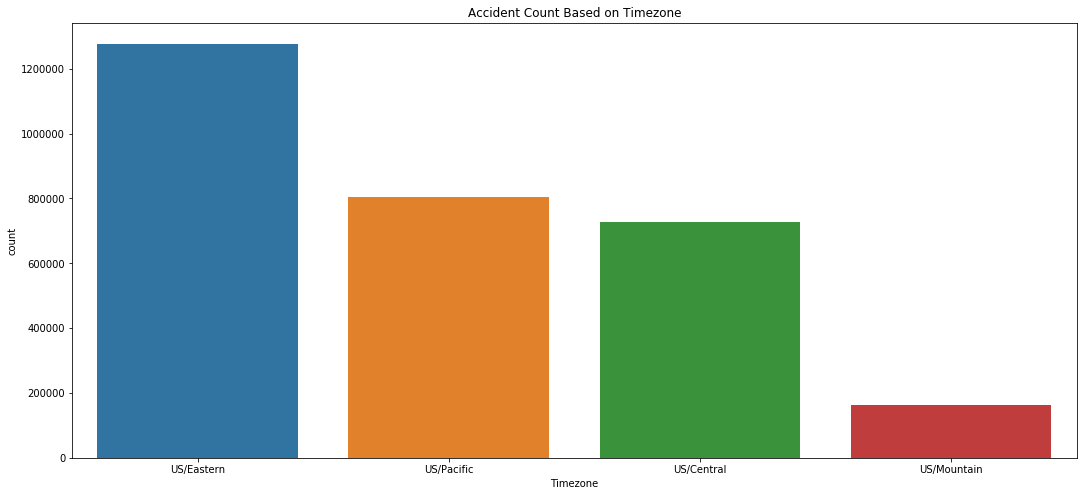

In [5]:
fig = plt.figure(figsize=[18, 8])
sns.countplot('Timezone',data=data,order=data['Timezone'].value_counts().index)
plt.title('Accident Count Based on Timezone')

Week Analysis

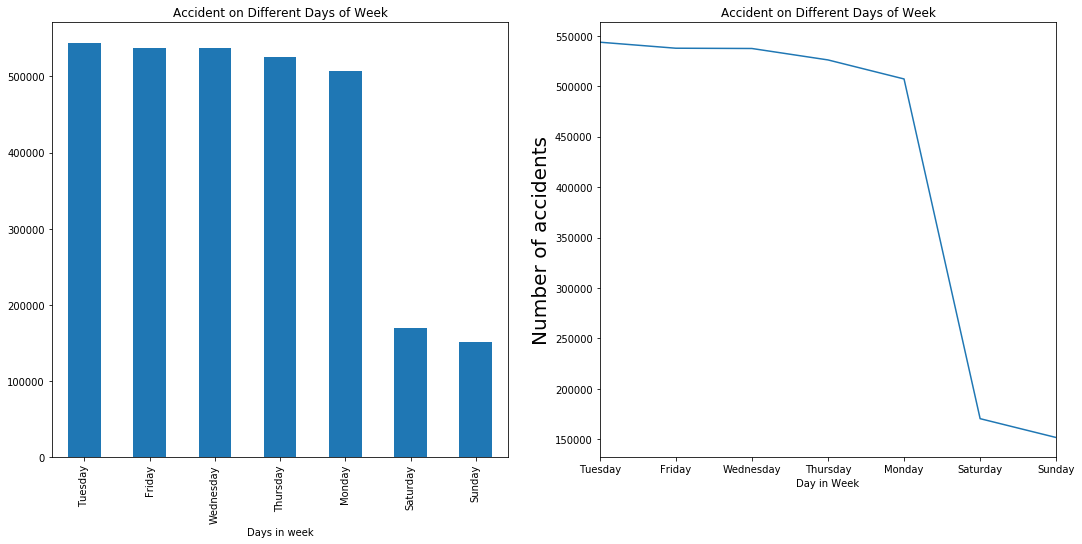

In [6]:
data['Start_Time'] = pd.to_datetime(data['Start_Time'], format="%Y/%m/%d %H:%M:%S")
data['DayOfWeekNum'] = data['Start_Time'].dt.dayofweek
data['DayOfWeek'] = data['Start_Time'].dt.weekday_name
data['MonthDayNum'] = data['Start_Time'].dt.day
data['HourOfDay'] = data['Start_Time'].dt.hour
fig, ax=plt.subplots(1,2,figsize=(18,8))
data['DayOfWeek'].value_counts(ascending=False).plot.line(ax=ax[1])
data['DayOfWeek'].value_counts(ascending=False).plot.bar(ax=ax[0])
ax[1].set_xlabel('Day in Week')
ax[0].set_xlabel('Days in week')
plt.ylabel('Number of accidents',fontsize=20)
ax[0].set_title('Accident on Different Days of Week')
ax[1].set_title('Accident on Different Days of Week')
plt.show()
plt.ioff()

Yearly Analysis

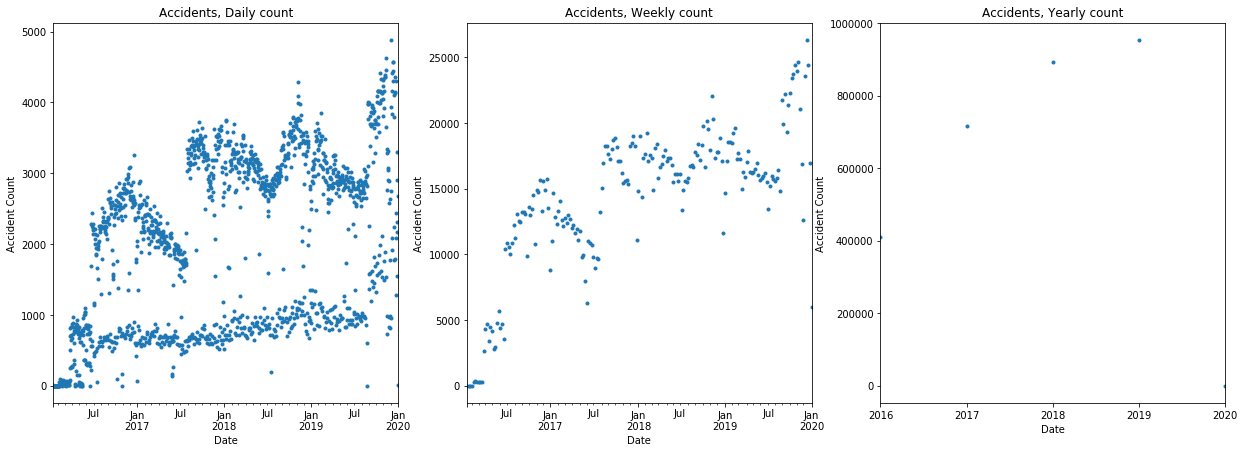

In [7]:
data['time'] = pd.to_datetime(data.Start_Time, format='%Y-%m-%d %H:%M:%S')
data = data.set_index('time')
data.head()
freq_text = {'D':'Daily','W':'Weekly','Y':'Yearly'}
plt.subplots(1,3,figsize=(21,7))
for i, (fr,text) in enumerate(freq_text.items(),1):
    plt.subplot(1,3,i)
    sample = data.ID['2016':].resample(fr).count()
    sample.plot(style='.')
    plt.title('Accidents, {} count'.format(text))
    plt.xlabel('Date')
    plt.ylabel('Accident Count');

top 20 accident durations correspond to 86.6% of the data


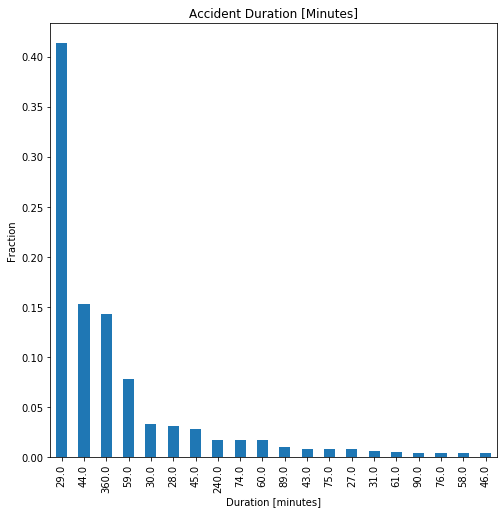

In [8]:
st = pd.to_datetime(data.Start_Time, format='%Y-%m-%d %H:%M:%S')
end = pd.to_datetime(data.End_Time, format='%Y-%m-%d %H:%M:%S')
diff = (end-st)
top20 = diff.astype('timedelta64[m]').value_counts().nlargest(20)
print('top 20 accident durations correspond to {:.1f}% of the data'.format(top20.sum()*100/len(diff)))
(top20/top20.sum()).plot.bar(figsize=(8,8))
plt.title('Accident Duration [Minutes]')
plt.xlabel('Duration [minutes]')
plt.ylabel('Fraction');

Text(0, 0.5, 'Number of Accidents')

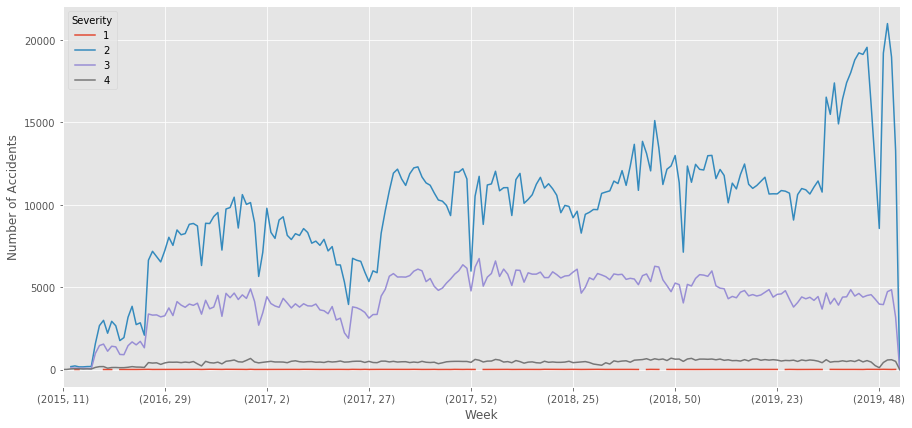

In [9]:
data['date'] = data['Start_Time']
data['Date'] = pd.to_datetime(data['date'], errors='coerce')
data['Week'] = data['Date'] .dt.week
data['Year'] = data['Date'] .dt.year
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(15,7))
data.groupby(['Year','Week','Severity']).count()['ID'].unstack().plot(ax=ax)
ax.set_xlabel('Week')
ax.set_ylabel('Number of Accidents')

Visualize US Accidents Dataset group by Year, Week and Severity

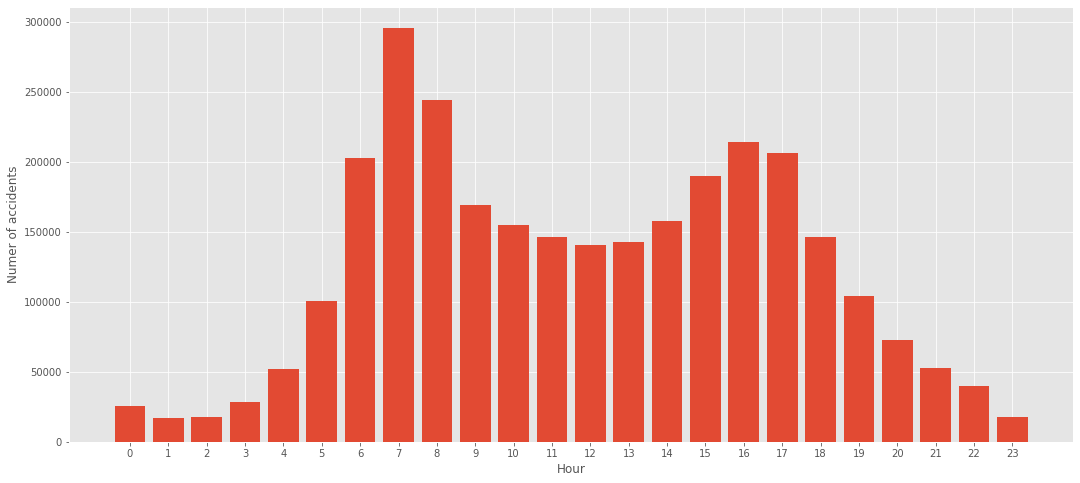

In [10]:
fig = plt.figure(figsize=[18, 8])
data['timestamp'] = pd.to_datetime(data['Weather_Timestamp'], errors='coerce')
data['Hour'] = data['timestamp'] .dt.hour
data['Minute'] = data['timestamp'] .dt.minute
hours = [hour for hour, df in data.groupby('Hour')]
plt.bar(hours, data.groupby(['Hour'])['ID'].count())
plt.xticks(hours)
plt.xlabel('Hour')
plt.ylabel('Numer of accidents')
plt.show()

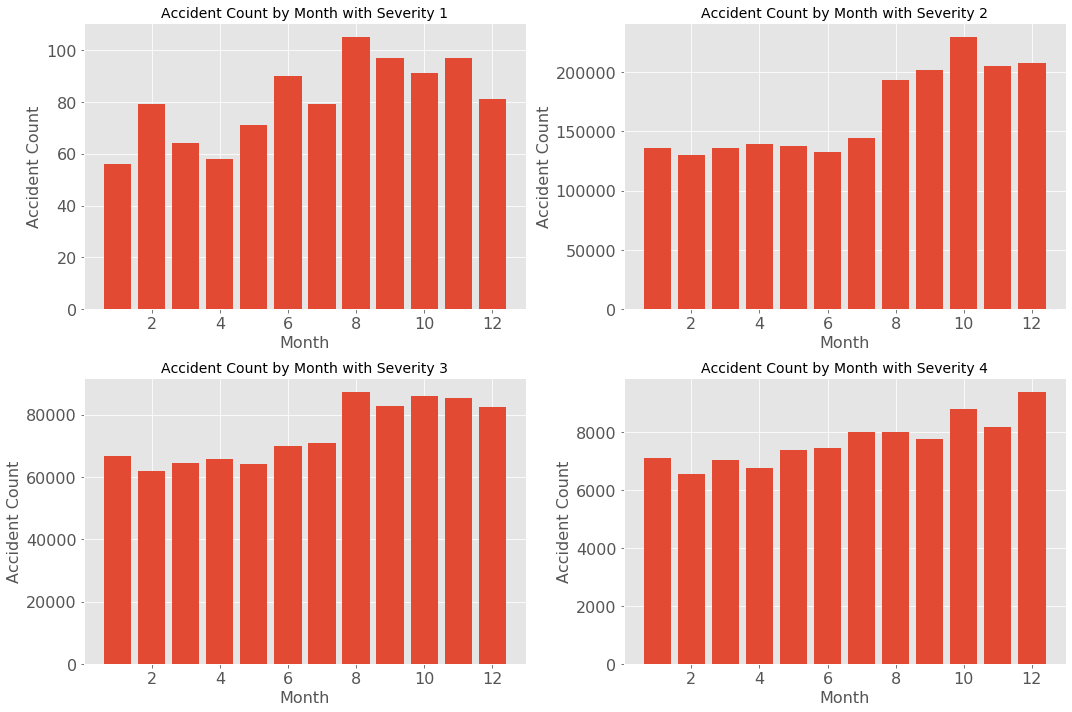

In [11]:
data['time'] = pd.to_datetime(data.Start_Time, format='%Y-%m-%d %H:%M:%S')
plt.subplots(2,2,figsize=(15,10))
for s in np.arange(1,5):
    plt.subplot(2,2,s)
    plt.hist(pd.DatetimeIndex(data.loc[data["Severity"] == s]['time']).month, bins=[1,2,3,4,5,6,7,8,9,10,11,12,13], align='left', rwidth=0.8)
    plt.title("Accident Count by Month with Severity " + str(s), fontsize=14)
    plt.xlabel("Month", fontsize=16)
    plt.ylabel("Accident Count", fontsize=16)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
plt.tight_layout()
plt.show()

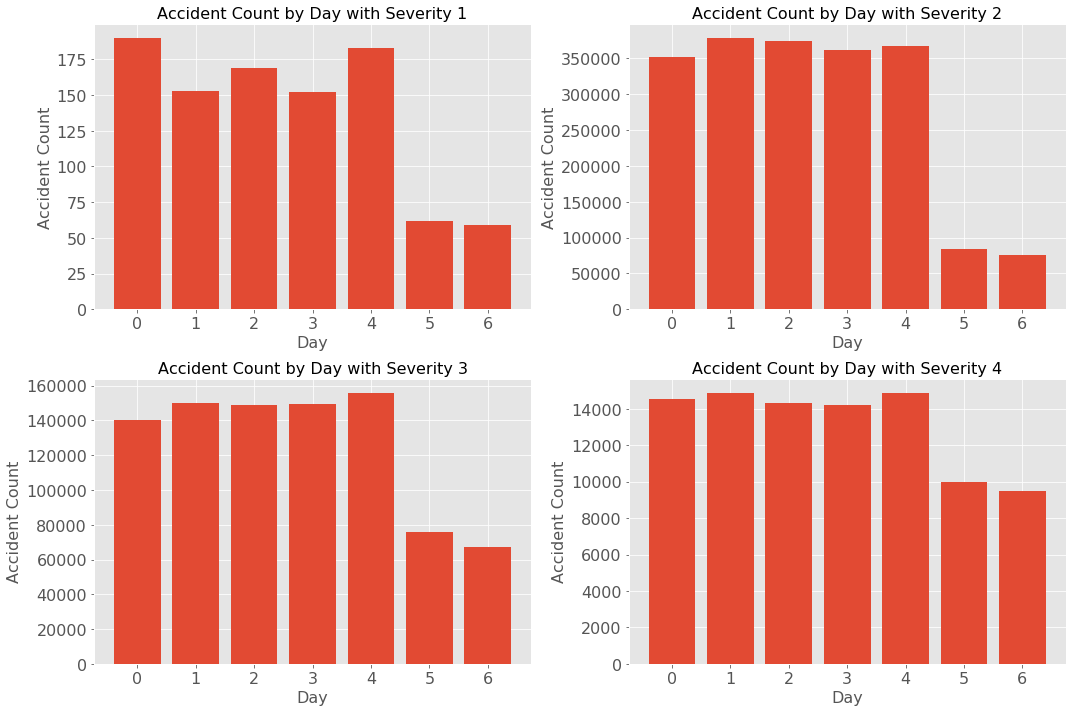

In [12]:
data['DayOfWeek'] = data['time'].dt.dayofweek
plt.subplots(2,2,figsize=(15,10))
for s in np.arange(1,5):
    plt.subplot(2,2,s)
    plt.hist(data.loc[data["Severity"] == s]['DayOfWeek'], bins=[0,1,2,3,4,5,6,7], align='left', rwidth=0.8)
    plt.title("Accident Count by Day with Severity " + str(s), fontsize=16)
    plt.xlabel("Day", fontsize=16)
    plt.ylabel("Accident Count", fontsize=16)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
plt.tight_layout()
plt.show()

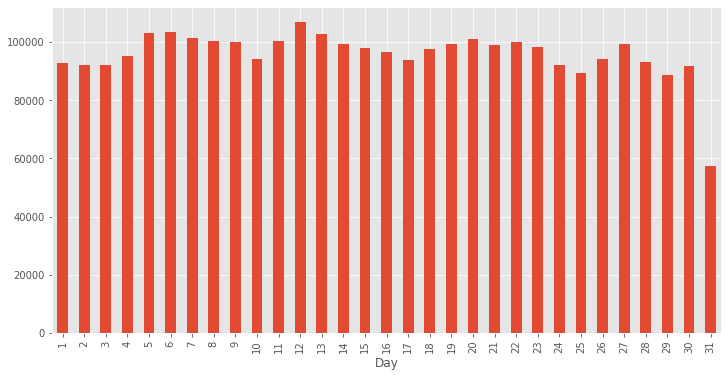

In [13]:
data['Start_Time'] = pd.to_datetime(data['Start_Time'])
data['Year'] = data['Start_Time'].dt.year
data['Month'] = data['Start_Time'].dt.month_name()
data['Day'] = data['Start_Time'].dt.day
data['Day_name'] = data['Start_Time'].dt.day_name()
data['Hour'] = data['Start_Time'].dt.hour
acc_by_day_of_month = data.groupby('Day').count()['ID']
acc_by_day_of_month.plot(kind='bar', figsize=(12, 6))

Text(0, 0.5, 'Number of Accidents')

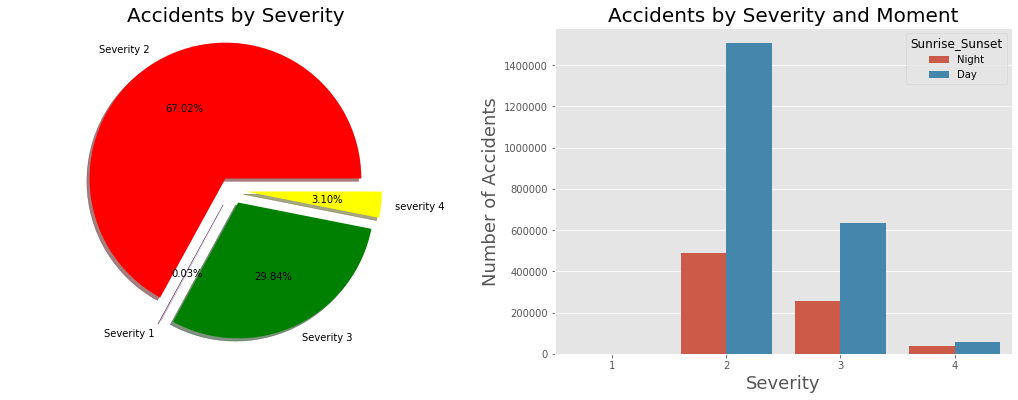

In [14]:
fig,ax = plt.subplots(1,2,figsize=(18,6))
sizes = data.groupby('Severity').size() 
sizes = sizes[[2,1,3,4]] 
labels = 'Severity 2','Severity 1', 'Severity 3', 'severity 4' 
explode = (0.1,0.1,0.1,0.1)
colors = ['red','purple','green','yellow']
ax[0].pie(sizes, explode=explode, labels= labels,colors=colors,autopct='%1.2f%%',shadow=True, startangle=0)
ax[0].axis('equal')
ax[0].set_title('Accidents by Severity', size=20)
sns.countplot(data=data,x='Severity', hue='Sunrise_Sunset',ax=ax[1])
ax[1].set_title('Accidents by Severity and Moment', size= 20)
ax[1].set_xlabel('Severity', size=18)
ax[1].set_ylabel('Number of Accidents', size=18)

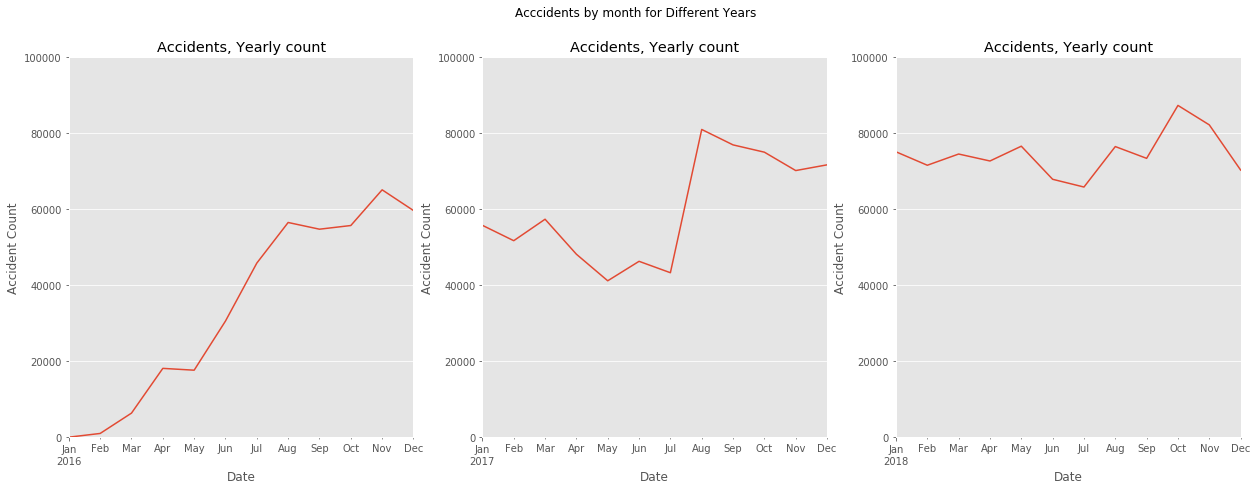

In [15]:
years = ['2016','2017','2018']
fig, _ = plt.subplots(1,3,figsize=(21,7), sharex='all', sharey='all')
fig.suptitle('Acccidents by month for Different Years')
plt.xlabel('month')
plt.ylabel('Accidents')
for i, year in enumerate(years,1):
    plt.subplot(1,3,i)
    sample = data.loc[year].ID.resample('M').count()
    sample.plot()
    plt.ylim(0,100000)
    plt.title('Accidents, {} count'.format(text))
    plt.xlabel('Date')
    plt.ylabel('Accident Count');